In [1]:
from src.create_dataset import main
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [3]:
from typing import Dict, List
dataset_type = Dict[str, Dict[int, Dict[str, List[float]]]]

In [4]:
def get_subdataset(dataset: dataset_type, hist_name: str, n_bins: int) -> Dict[str, List[float]]:
    res = {}
    for model_name in dataset.keys():
        res[model_name] = dataset[model_name][n_bins][hist_name]
    return res 

In [5]:
models_path = 'data/models'
dataset_file = f'{models_path}/dataset.pkl'
labels_file = f'{models_path}/labels.txt'

with open(dataset_file, 'rb') as f:
    dataset = pickle.load(f)
    
with open(labels_file, 'r') as f:
    labels = {fn.strip(): label.strip() for fn, label in map(lambda x: x.strip('\n').split(','), f.readlines())}
    
models_names = list(dataset.keys())
n_bins_set = set(dataset[models_names[0]].keys())
hists_names_set = set(dataset[models_names[0]][list(n_bins_set)[0]].keys())
len(models_names), n_bins_set, hists_names_set

(100,
 {8, 16, 32, 64, 128},
 {'model_bounding_sphere_concentric_sphere',
  'model_bounding_sphere_missed',
  'model_bounding_sphere_strict_outer',
  'model_bounding_sphere_strict_outer_absolute'})

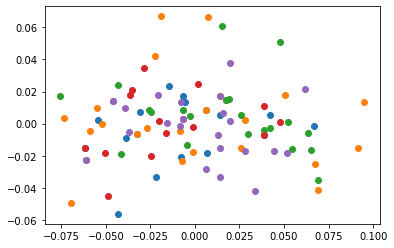

In [13]:
subdataset = get_subdataset(dataset, 'model_bounding_sphere_concentric_sphere', 128)
names, X = zip(*subdataset.items())
X = np.array(X)

r_labels = list(map(lambda x: x.split('.')[0], list(labels.values())))

le = LabelEncoder().fit(r_labels)
tr_labels = le.transform(r_labels)
np.unique(tr_labels), np.unique(r_labels)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
plt.show()

# X_r = TSNE(n_components=2).fit_transform(X)
# for cls in np.unique(tr_labels):
#     plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    

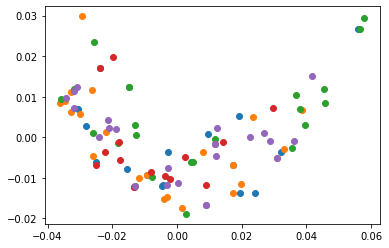

In [14]:
subdataset = get_subdataset(dataset, 'model_bounding_sphere_missed', 128)
names, X = zip(*subdataset.items())
X = np.array(X)

r_labels = list(map(lambda x: x.split('.')[0], list(labels.values())))

le = LabelEncoder().fit(r_labels)
tr_labels = le.transform(r_labels)
np.unique(tr_labels), np.unique(r_labels)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    
# X_r = TSNE(n_components=2).fit_transform(X)
# for cls in np.unique(tr_labels):
#     plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    

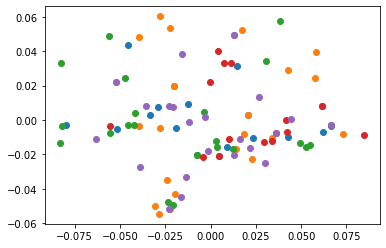

In [15]:
subdataset = get_subdataset(dataset, 'model_bounding_sphere_strict_outer', 128)
names, X = zip(*subdataset.items())
X = np.array(X)

r_labels = list(map(lambda x: x.split('.')[0], list(labels.values())))

le = LabelEncoder().fit(r_labels)
tr_labels = le.transform(r_labels)
np.unique(tr_labels), np.unique(r_labels)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    
# X_r = TSNE(n_components=2).fit_transform(X)
# for cls in np.unique(tr_labels):
#     plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    

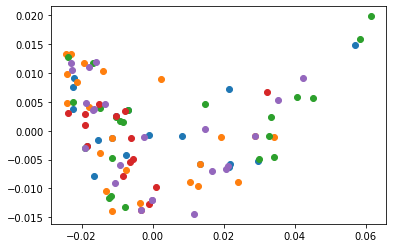

In [16]:
subdataset = get_subdataset(dataset, 'model_bounding_sphere_strict_outer_absolute', 128)
names, X = zip(*subdataset.items())
X = np.array(X)

r_labels = list(map(lambda x: x.split('.')[0], list(labels.values())))

le = LabelEncoder().fit(r_labels)
tr_labels = le.transform(r_labels)
np.unique(tr_labels), np.unique(r_labels)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    
# X_r = TSNE(n_components=2).fit_transform(X)
# for cls in np.unique(tr_labels):
#     plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')
    

In [55]:
le = LabelEncoder().fit(r_labels)
tr_labels = le.transform(r_labels)
np.unique(tr_labels), np.unique(r_labels)

(array([0, 1, 2, 3, 4]),
 array(['Cone', 'Cube', 'Cylinder', 'Sphere', 'Torus'], dtype='<U8'))

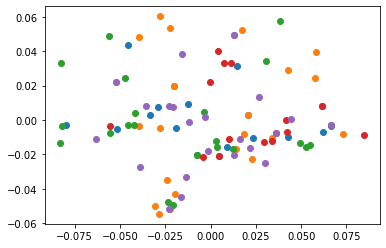

In [60]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')

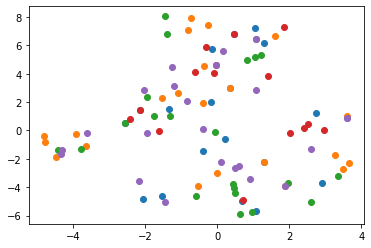

In [64]:
X_r = TSNE(n_components=2).fit_transform(X)
for cls in np.unique(tr_labels):
    plt.scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1')

In [30]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [31]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
Z = kmeans.predict(X)

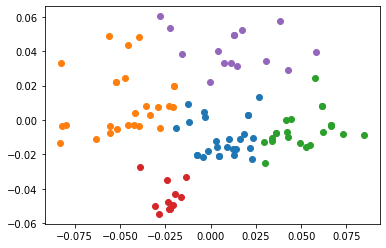

In [32]:
for cls in np.unique(Z):
    plt.scatter(X_r[Z==cls, 0], X_r[Z==cls, 1], cmap='Set1')

In [33]:
[names[i] for i in np.where(Z==0)[:10][0]]

['79b8bdd3-ee01-4899-a776-0d01377a4365.stl',
 '7e6626a6-709e-4425-8d66-e0699e384474.stl',
 '5e23c39d-1349-4eb5-8d1f-5dfb349230aa.stl',
 '54709c40-3959-4e14-a395-727226bd0ec1.stl',
 '6e909f6a-4f85-40eb-a0a8-6513584c7e8a.stl',
 'eac7637f-efcd-4086-ba8b-c694f4622e94.stl',
 '753a6401-b806-4d28-b78a-2fddae208dd1.stl',
 '7030880e-bf6b-4bb3-9c97-31b2a9bbede2.stl',
 '14e7d1ef-bd0c-406b-8d61-c3000cedbffb.stl',
 'e935aba9-d217-4478-879c-7a06c8bb547f.stl',
 '0d07a70e-c359-4ea9-869f-a1c7b281d6f8.stl',
 '956b972f-4d4e-4507-a868-72d7bc681593.stl',
 '2bf3d96e-1d23-409b-a50d-2fc704f59eaf.stl',
 '1001d024-b70d-4e39-a9cb-408cbd07cd46.stl',
 '444fb035-8924-4da1-978b-d32dad4354db.stl',
 '02643f5e-b1eb-4dc9-bc05-0bb811d97652.stl',
 '976d562b-6e65-404c-9a49-e08b13df780c.stl',
 'c98192e8-8cf7-4772-a719-56b43359f838.stl',
 '7c05d316-a210-40ae-a5c1-16ca047d7e2e.stl',
 'eccb3321-ebcc-4bbf-a85c-4c18a8a6511a.stl',
 'd11b96fa-1a04-4982-b34d-e0712f25c8c1.stl',
 '6858a3dc-7b58-464d-9873-c0e6c029570a.stl',
 '7be32385

In [84]:
np.where(Z==0)[:10]

(array([ 1,  2,  4,  8, 12, 13, 14, 15, 21, 27, 28, 29, 30, 31, 33, 34, 37,
        41, 42, 43, 44, 47, 48, 49, 50, 51, 55, 59, 62, 65, 66, 67, 68, 70,
        72, 79, 84, 86, 87, 89, 93, 98, 99]),)